In [5]:
#Step 1: Load the Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_submission_df = pd.read_csv('/content/gender_submission.csv')

In [6]:
#Step 2: Inspect the Data

print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
#Step 3: Data Cleaning
#Handling missing values
#For example, fill missing age values with median age

train_df.fillna({'Age': train_df['Age'].median()}, inplace=True)
train_df.fillna({'Embarked': train_df['Embarked'].mode()[0]}, inplace=True)
train_df.fillna({'Cabin': 'Unknown'}, inplace=True)

In [11]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
#Drop unnecesarry columns
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

#Encode categorical variables
#Convert 'Sex' to numerical values
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

#Convert 'Embarked' to numerical values
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

<ipython-input-14-6b6b6c082783>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='bright')


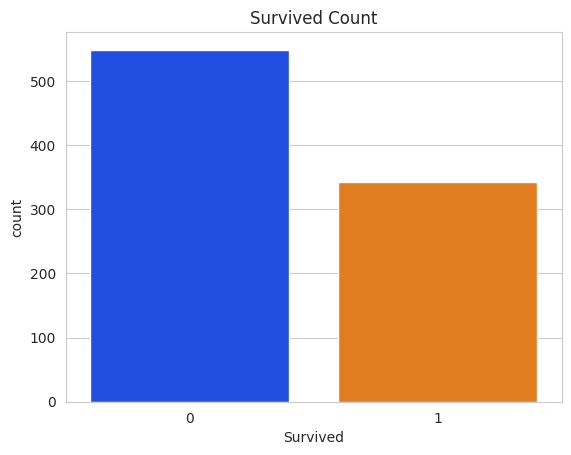

<ipython-input-14-6b6b6c082783>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=train_df, palette='bright')


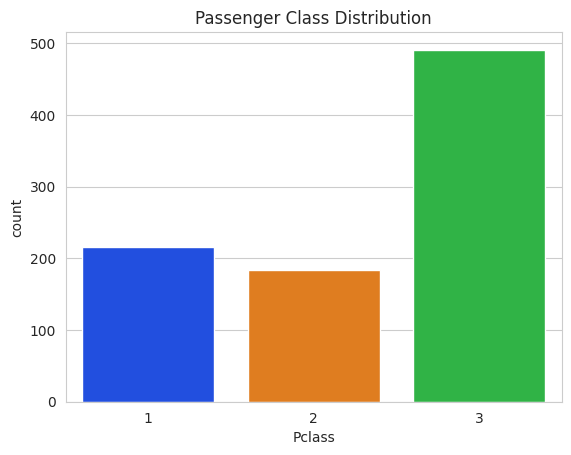

<ipython-input-14-6b6b6c082783>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'], kde=True, bins=40, color='red')


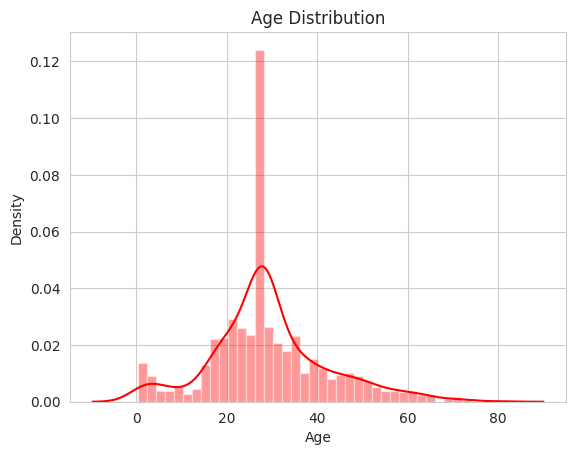

<ipython-input-14-6b6b6c082783>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=train_df, palette='bright')


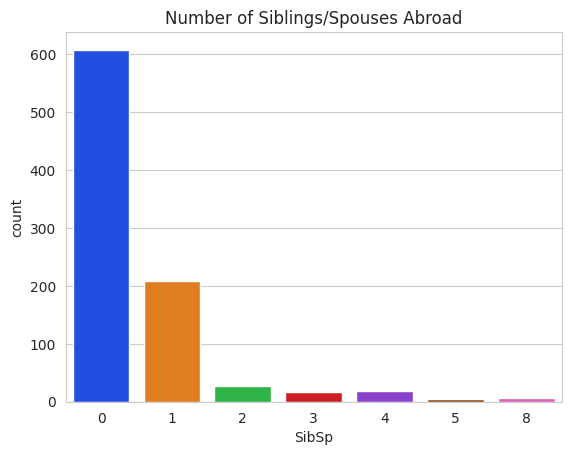

<ipython-input-14-6b6b6c082783>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch', data=train_df, palette='bright')


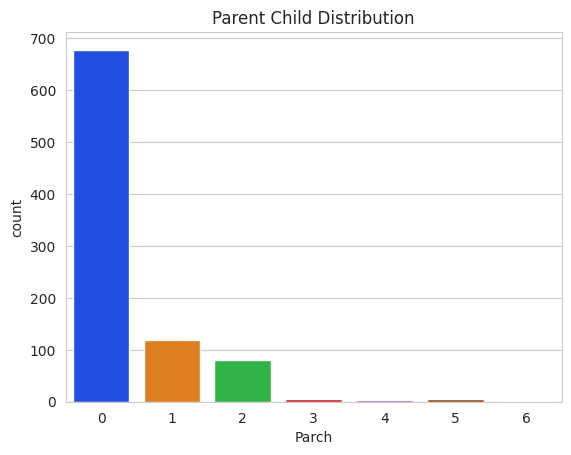

In [14]:
#Step 4.1: Univarite analysis

#Survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_df, palette='bright')
plt.title('Survived Count')
plt.show()

#Pclass
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data=train_df, palette='bright')
plt.title('Passenger Class Distribution')
plt.show()

#Age
sns.distplot(train_df['Age'], kde=True, bins=40, color='red')
plt.title('Age Distribution')
plt.show()

#SibSp
sns.countplot(x='SibSp', data=train_df, palette='bright')
plt.title('Number of Siblings/Spouses Abroad')
plt.show()

#Parch
sns.countplot(x='Parch', data=train_df, palette='bright')
plt.title('Parent Child Distribution')
plt.show()

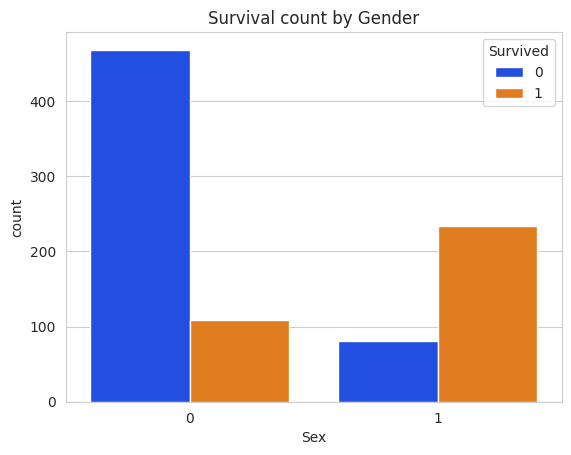

<ipython-input-15-ac3c086ffcea>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=train_df, palette='bright')


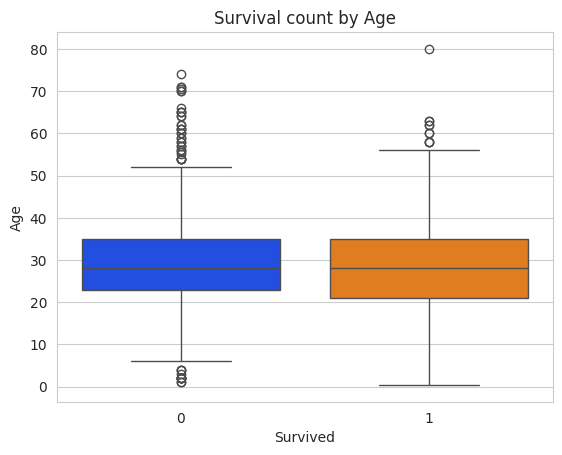

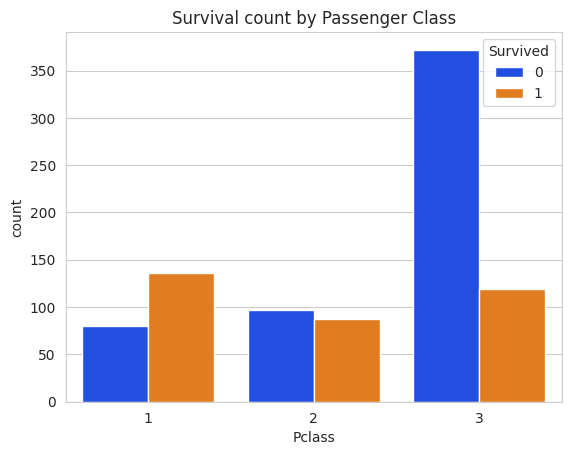

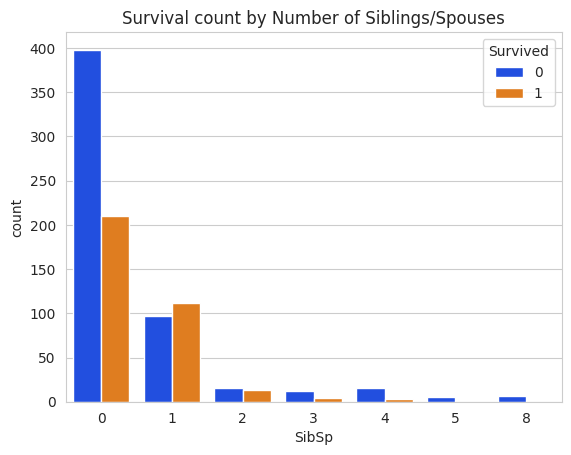

<ipython-input-15-ac3c086ffcea>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train_df, palette='bright')


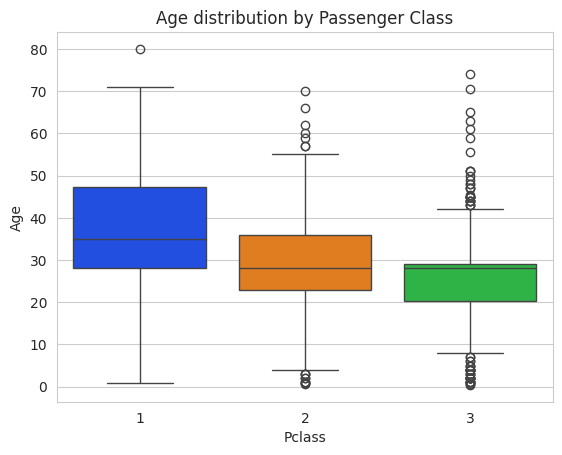

In [15]:
#Step 4.2: Bivariate Analysis

#Survived vs Sex
sns.set_style('whitegrid')
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='bright')
plt.title('Survival count by Gender')
plt.show()

#Survived vs Age
sns.boxplot(x='Survived', y='Age', data=train_df, palette='bright')
plt.title('Survival count by Age')
plt.show()

#Pclass vs survived
sns.set_style('whitegrid')
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='bright')
plt.title('Survival count by Passenger Class')
plt.show()

#Survived vs sibsp
sns.countplot(x='SibSp', hue='Survived', data=train_df, palette='bright')
plt.title('Survival count by Number of Siblings/Spouses')
plt.show()

#Pclass vs Age
sns.boxplot(x='Pclass', y='Age', data=train_df, palette='bright')
plt.title('Age distribution by Passenger Class')
plt.show()

<Figure size 1200x800 with 0 Axes>

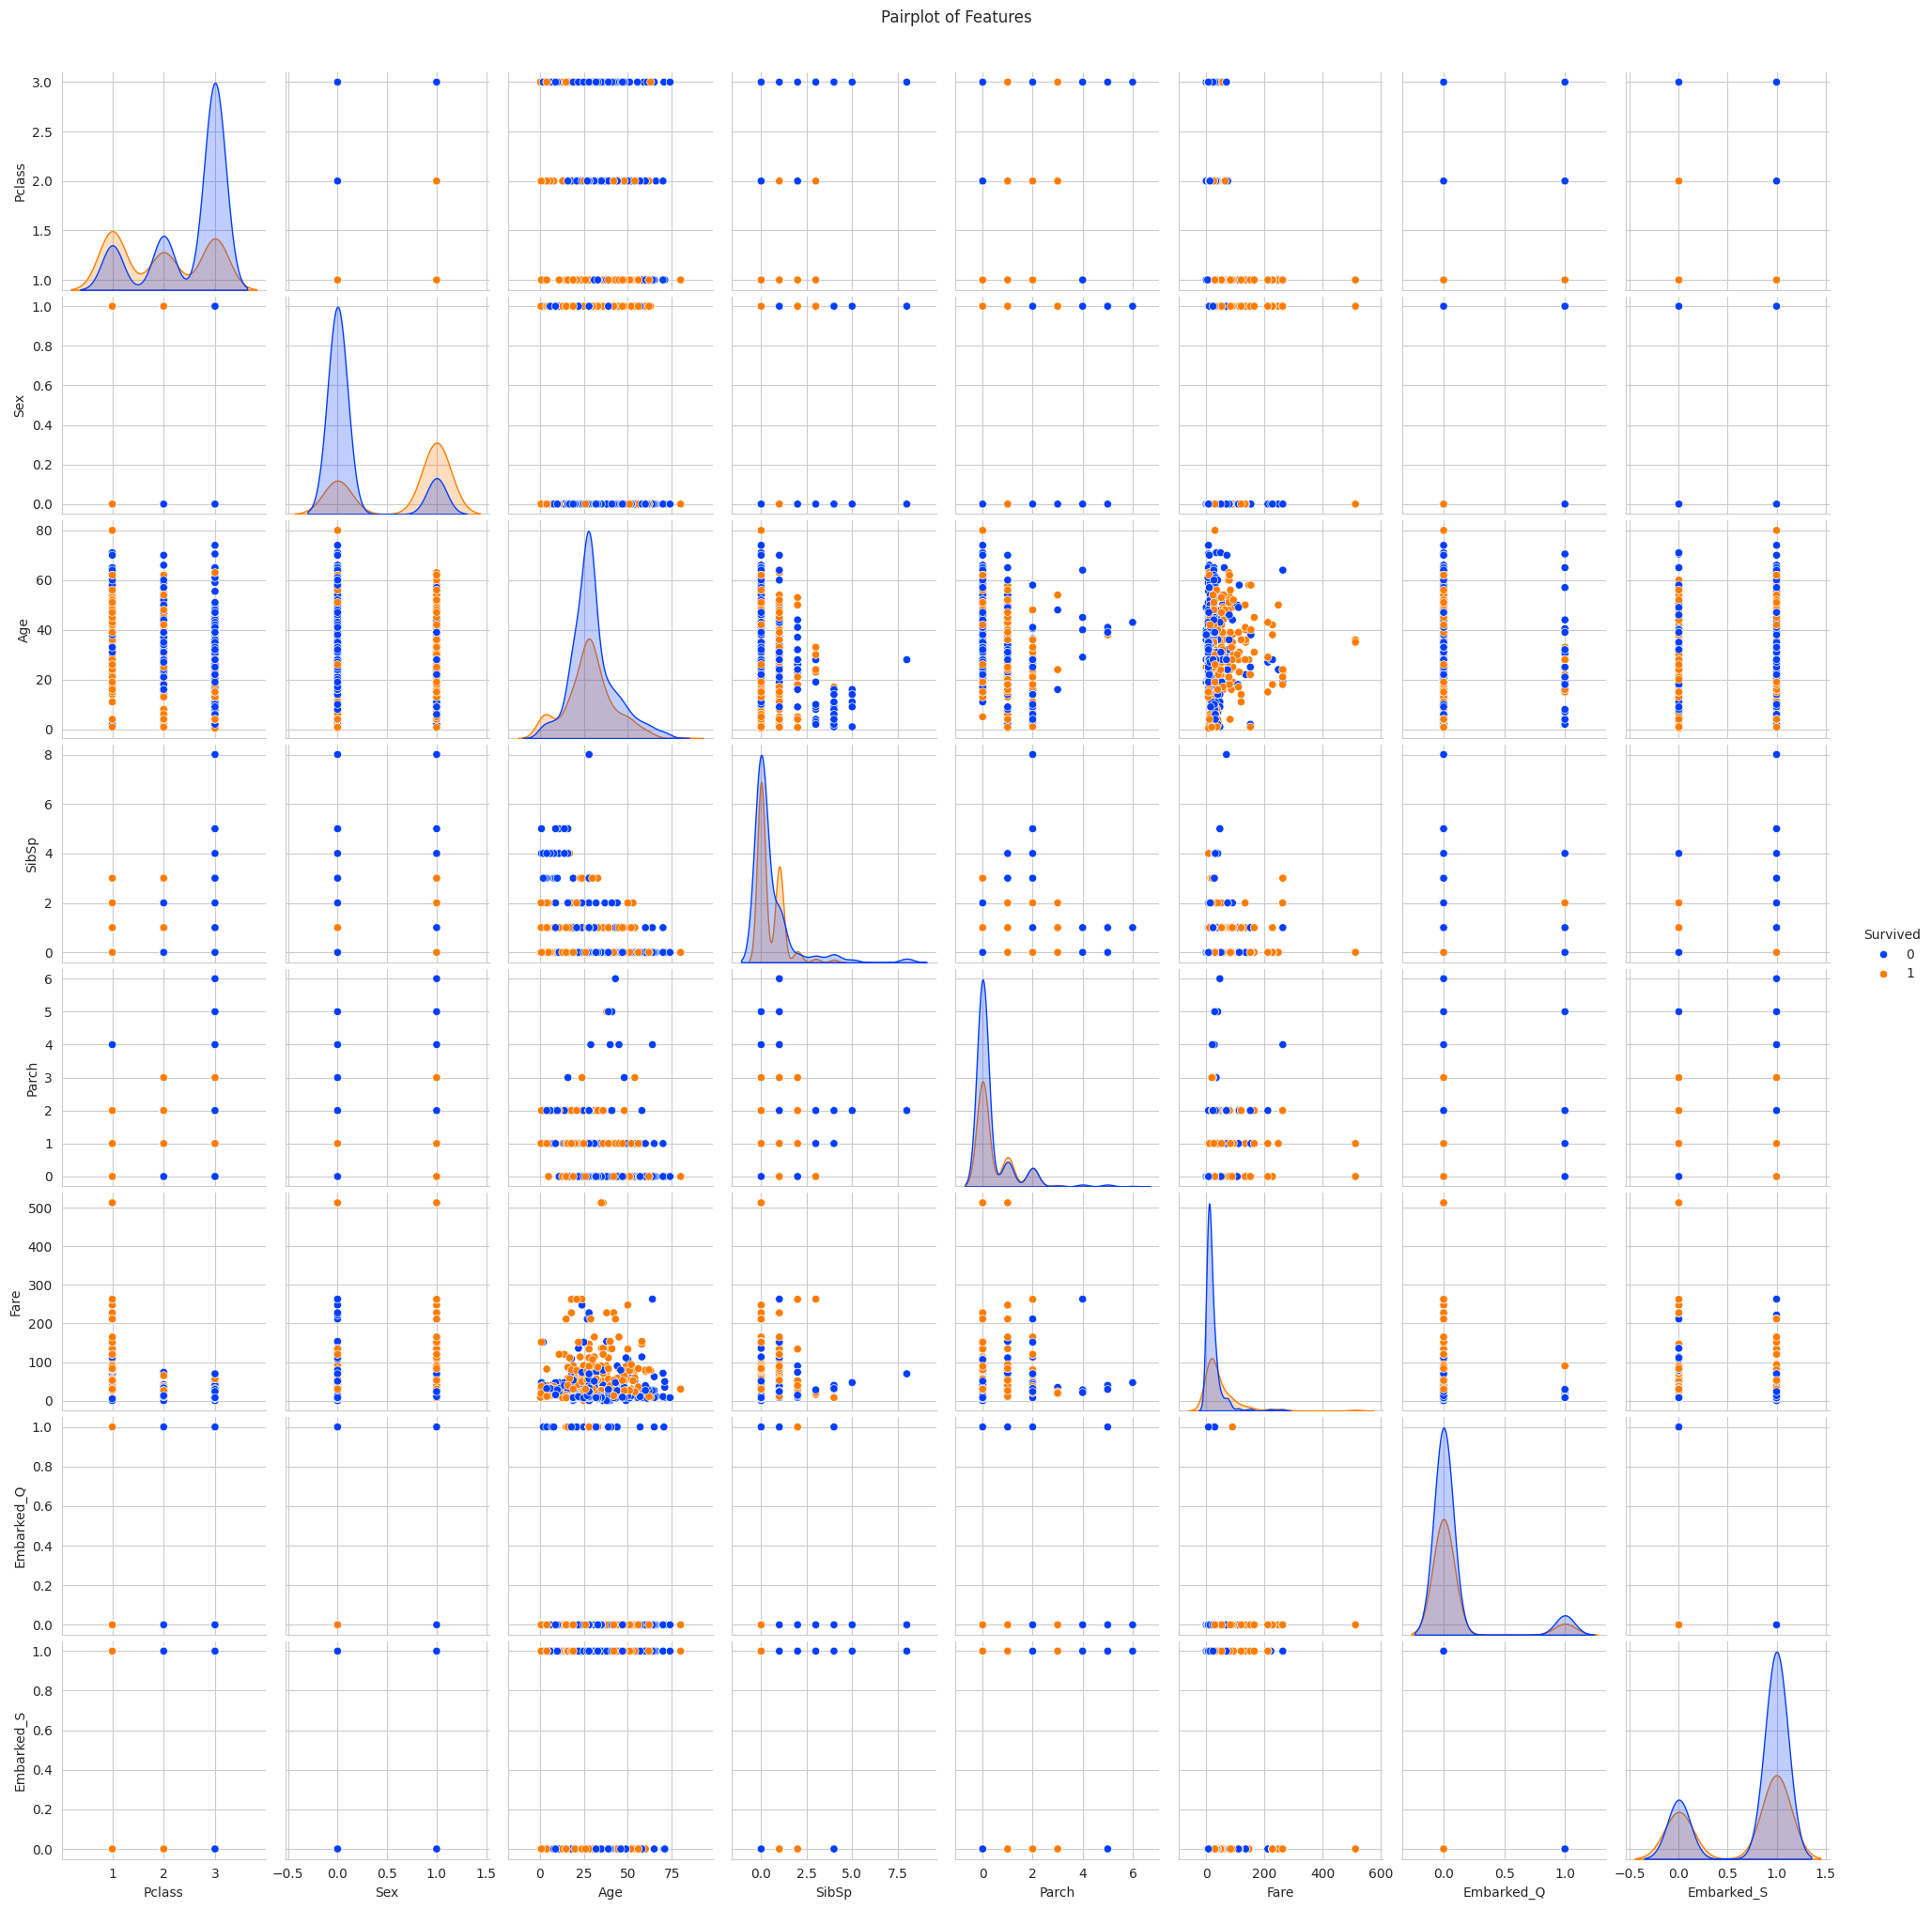

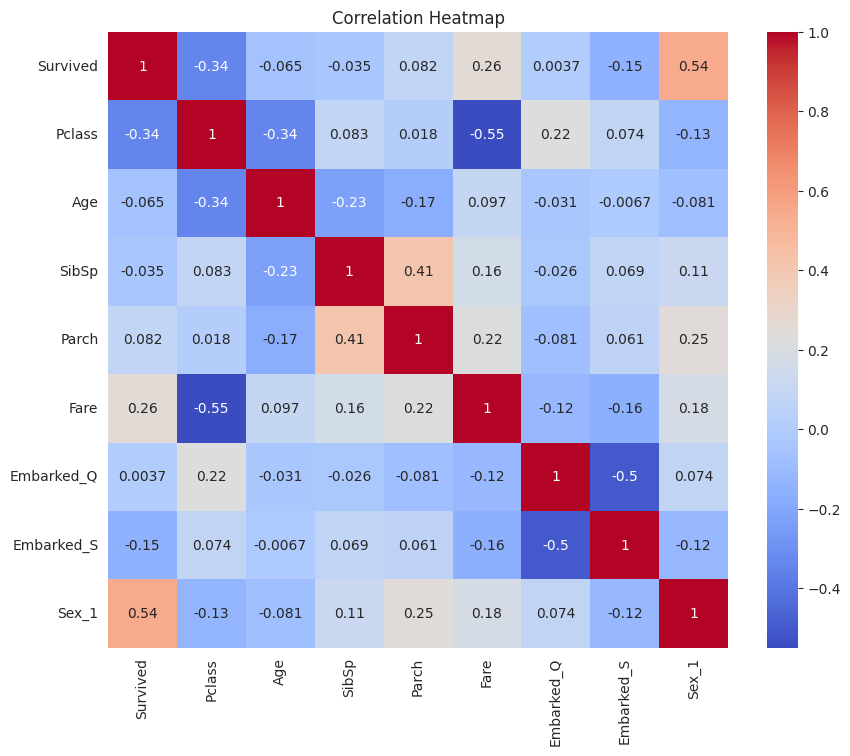

In [16]:
#Step 4.3: Multivariate Analysis

#Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(train_df, hue='Survived', palette='bright')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

#One-hot encode categorical variables (only 'Sex' in this case)
train_df_encoded = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)

#Drop unnecessary columns
train_df_encoded.drop(columns=['Cabin'], inplace=True)

#Corelation heatmap
plt.figure(figsize=(10, 8))
corelation_matrix = train_df_encoded.corr()
sns.heatmap(train_df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
print(train_df_encoded.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0         0       3  22.0      1      0   7.2500       False        True   
1         1       1  38.0      1      0  71.2833       False       False   
2         1       3  26.0      0      0   7.9250       False        True   
3         1       1  35.0      1      0  53.1000       False        True   
4         0       3  35.0      0      0   8.0500       False        True   

   Sex_1  
0  False  
1   True  
2   True  
3   True  
4  False  
